Written by 김천지

# Quotes 데이터 분석하기
- 진행 내용
    - 결측치와 중복을 제거한다.
    - 토큰 길이가 5 이상이고 42 미만인 데이터만 추출한다.       
    - 자주 등장하는 저자 2000명만 추출한다.
    - 하이픈이 2개 이상 있는 카테고리는 제거한다.
    - 카테고리가 개수가 5개를 초과하는 경우, 6번 째부터는 잘라낸다.
    - 데이터를 저장한다.
    

## 전처리
- 결측치와 중복 제거

In [1]:
# EDA to the quotes dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import os

# get the file path
file_path = os.getcwd() + '/quotes.csv'

# read the file
df = pd.read_csv(file_path)

In [2]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499709 entries, 0 to 499708
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   quote     499708 non-null  object
 1   author    497956 non-null  object
 2   category  499646 non-null  object
dtypes: object(3)
memory usage: 11.4+ MB
None


,quote,author,category
0,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,"attributed-no-source, best, life, love, mistak..."
1,You've gotta dance like there's nobody watchin...,William W. Purkey,"dance, heaven, hurt, inspirational, life, love..."
2,You know you're in love when you can't fall as...,Dr. Seuss,"attributed-no-source, dreams, love, reality, s..."
3,A friend is someone who knows all about you an...,Elbert Hubbard,"friend, friendship, knowledge, love"
4,Darkness cannot drive out darkness: only light...,"Martin Luther King Jr., A Testament of Hope: T...","darkness, drive-out, hate, inspirational, ligh..."


In [3]:
# remove nan values and duplicates
df.dropna(inplace=True, axis=0, how='any')
df.drop_duplicates(inplace=True)

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 495456 entries, 0 to 499708
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   quote     495456 non-null  object
 1   author    495456 non-null  object
 2   category  495456 non-null  object
dtypes: object(3)
memory usage: 15.1+ MB
None


In [5]:
# check randomly selected 20 rows
df.sample(20)['quote'].values

array(['This universe belongs to those who know how to see, feel, and love the beauty of life and the universe.',
       'Ah, that shows you the power of music, that magician of magician, who lifts his wand and says his mysterious word and all things real pass away and the phantoms of your mind walk before you clothed in flesh.',
       'sometimes I hearscreaming like a childand wake upto find it’s me',
       'Our audacity must be rooted in our humility.',
       "In a brutal country like ours, where human life is 'cheap', it's stupid to destroy yourself for the sake of your beliefs. Beliefs? High ideas? Only people in rich countries can enjoy such luxuries.",
       'If you can stay positive in bad situations, you are strong; if you can stay positive in hopeless situations, you are mighty; if you can stay positive in impossible situations, you are great.',
       'It is Jesus that you seek when you dream of happiness; He is waiting for you when nothing else you find satisfies you; He

## 토큰 길이 분포 확인
- 토큰 길이 살펴보기
    - 2분위수(25%)의 토큰 개수: 14.0
    - 3분위수(50%)의 토큰 개수: 23.0
    - 4분위수(75%)의 토큰 개수: 42.0

- 결과
    - 토큰의 개수가 5개 이상이고, 42개 미만인 구절만 선택하기.

In [6]:
# 토큰의 길이 분포 확인하기
df['token length'] = df['quote'].apply(lambda x: len(x.split()))
df['token length'].describe()

count    495456.000000
mean         36.028455
std          41.854705
min           1.000000
25%          14.000000
50%          23.000000
75%          42.000000
max         811.000000
Name: token length, dtype: float64

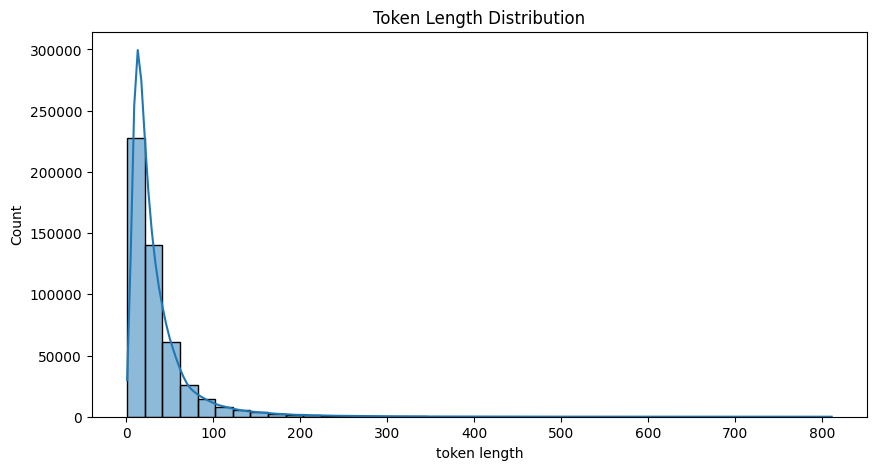

In [7]:
# 토큰의 길이 분포 확인하기
plt.figure(figsize=(10, 5))
sns.histplot(df['token length'], bins=40, kde=True)
plt.title('Token Length Distribution')
plt.show()


In [8]:
# 2, 3, 4분위수의 토큰 개수 출력
print('2분위수(25%)의 토큰 개수:', np.percentile(df['token length'], 25))
print('3분위수(50%)의 토큰 개수:', np.percentile(df['token length'], 50))
print('4분위수(75%)의 토큰 개수:', np.percentile(df['token length'], 75))

2분위수(25%)의 토큰 개수: 14.0
3분위수(50%)의 토큰 개수: 23.0
4분위수(75%)의 토큰 개수: 42.0


In [9]:
# 토큰 개수 범위 별 데이터 살피기
start_len = 0
end_len = 4
df[(df['token length'] >= start_len) & (df['token length'] <= end_len)]
data_in_range = df[(df['token length'] >= start_len) & (df['token length'] <= end_len)]['quote'].values

In [10]:
print(f'토큰 개수가 {start_len}개에서 {end_len}개인 데이터 샘플: {len(data_in_range)}')
print('-----------------------------------')
for e in data_in_range:
    print(e)

# 토큰 개수가 0개에서 1개인 데이터 샘플: 80
# 토큰 개수가 0개에서 2개인 데이터 샘플: 368    
# 토큰 개수가 0개에서 3개인 데이터 샘플: 1812
# 토큰 개수가 0개에서 4개인 데이터 샘플: 5034
# 토큰 개수가 0개에서 5개인 데이터 샘플: 10705

토큰 개수가 0개에서 4개인 데이터 샘플: 5034
-----------------------------------
After all this time?""Always...
Lovers alone wear sunlight.
Sweets to the sweet.
I...will never...regret you.
Love as thou wilt
Love simply is.
Love never dies.
Love fades. Mine has.
Waiting is erotic
Peace,love,empathy
People die. Love endures.
Don't touch me
Some people have lives
You live but once
It’s your life
Action expresses priorities.
We never live
Fate loves the fearless.
Sometimes life happens.
Don't Worry Be Happy
Live free or die.
Create your own miracles
Everybody's damaged by something.
Imitation is suicide.
Find ecstasy in life
Love changes things
In a well-ordered universe...
Imagine no limitations
Be where you are
Truth is beauty
Life stand still here.
Never compromise your values.
Applaud my idiocy.
Be yourself
Things do not change
Maktub" (It is written.)
Know thyself.
Stay hungry. Stay foolish.
We don't receive wisdom
Laughter is carbonated holiness.
Normalness leads to sadness.
Happiness cannot be pu

토큰 개수가 5개 이상이고 42개 미만인 구절만 남기자


In [11]:
# 토큰 개수가 5개 이상이고 42개 미만인 구절만 남긴다.
df = df[(df['token length'] >= 5) & (df['token length'] < 42)]
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 362589 entries, 0 to 499708
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   quote         362589 non-null  object
 1   author        362589 non-null  object
 2   category      362589 non-null  object
 3   token length  362589 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 13.8+ MB
None


## EDA

In [12]:
df

,quote,author,category,token length
0,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,"attributed-no-source, best, life, love, mistak...",41
1,You've gotta dance like there's nobody watchin...,William W. Purkey,"dance, heaven, hurt, inspirational, life, love...",22
2,You know you're in love when you can't fall as...,Dr. Seuss,"attributed-no-source, dreams, love, reality, s...",18
3,A friend is someone who knows all about you an...,Elbert Hubbard,"friend, friendship, knowledge, love",13
4,Darkness cannot drive out darkness: only light...,"Martin Luther King Jr., A Testament of Hope: T...","darkness, drive-out, hate, inspirational, ligh...",20
...,...,...,...,...
499702,The future isn't just a place you'll go. It's ...,Nancy Duarte,"You, Place, Will",14
499703,The Christian of the future will be a mystic o...,Karl Rahner,"Christian, Will, Exist",16
499704,I do believe the most important thing I can do...,John C. Stennis,"Past, Believe, Help",24
499707,"In all my life and in the future, I will alway...",Norodom Sihamoni,"Life, My Life, Servant",22


## 저자(author) 살펴보기
- 저자가 미상인 데이터는 삭제한다.
- 데이터에서 빈출하는 저자 상위 2000명만의 구절만 남긴다.

In [13]:
# 저자 내용 살펴보기
df['author'].sample(20)

"""
    저자 내용을 살펴보면 알겠지만,
    저자 이름과 함께 작품 제목이 함께 들어가 있는 경우가 많다.
    이런 경우 저자 이름만 따로 추출해주자.
    편의상 다 소문자로 바꿔주자.
"""
df['author_name_only'] = df['author'].apply(lambda x: x.split(',')[0].lower())

In [14]:
df

,quote,author,category,token length,author_name_only
0,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,"attributed-no-source, best, life, love, mistak...",41,marilyn monroe
1,You've gotta dance like there's nobody watchin...,William W. Purkey,"dance, heaven, hurt, inspirational, life, love...",22,william w. purkey
2,You know you're in love when you can't fall as...,Dr. Seuss,"attributed-no-source, dreams, love, reality, s...",18,dr. seuss
3,A friend is someone who knows all about you an...,Elbert Hubbard,"friend, friendship, knowledge, love",13,elbert hubbard
4,Darkness cannot drive out darkness: only light...,"Martin Luther King Jr., A Testament of Hope: T...","darkness, drive-out, hate, inspirational, ligh...",20,martin luther king jr.
...,...,...,...,...,...
499702,The future isn't just a place you'll go. It's ...,Nancy Duarte,"You, Place, Will",14,nancy duarte
499703,The Christian of the future will be a mystic o...,Karl Rahner,"Christian, Will, Exist",16,karl rahner
499704,I do believe the most important thing I can do...,John C. Stennis,"Past, Believe, Help",24,john c. stennis
499707,"In all my life and in the future, I will alway...",Norodom Sihamoni,"Life, My Life, Servant",22,norodom sihamoni


In [15]:
# 저자의 총 수는 얼마인가
author_count = df['author_name_only'].value_counts()
author_names = list(set(df['author_name_only'].values))
len(author_names)

64970

In [16]:
# 저자가 미상인 경우가 있는지 확인
print('anonymous' in author_names)
print('unknown' in author_names)
print('anon' in author_names)
print('anonymus' in author_names)

True
True
True
True


In [17]:
# anon으로 시작하는 저자 이름을 찾아보자.
anon_author = [author for author in author_names if author.startswith('anon')]

# unk으로 시작하는 저자 이름을 찾아보자.
unk_author = [author for author in author_names if author.startswith('unk')]

print(anon_author)
print(unk_author)

['anonymous.', 'anonymus autor', 'anonymous', 'anonymous chinese woman', 'anonymousse', 'anonymous holy bible job 5 7', 'anonymous (?)', 'anonymouse', 'anonymous inscription left in the wall of a german internment camp', 'anonymous bushman', 'anonyms', 'anonymous puritan prayer', 'anonymous young girl', 'anonymous bumper sticker', 'anonymous american lawyer', 'anon.', 'anonymous i think', 'anonymous christian pastor', 'anonomyous.', 'anonymous prisoner', 'anonymous holy bible 1 corinthians 13 13', 'anonymous facebook', 'anonomyus', 'anon1467', 'anonymus', 'anonymous zen', 'anonymousmale1', 'anon']
['unknown.', 'unknown author 909', 'unknown phylosopher', 'unknown 9', 'unknown author', 'unknown author 672', 'unknown author 47', 'unknown from apples of gold', 'unknow', 'unknownwn', 'unknownnown', 'unknown author 516', 'unknown british biologist', 'unknown author (possibly lewis carrol).', 'unknown wattpad writer', 'unknown or the archictect from the matrix reloaded movie', 'unknown autho

In [18]:
# 위에 해당하는 데이터는 전부 삭제한다.
df = df[~df['author_name_only'].isin(anon_author)]
df = df[~df['author_name_only'].isin(unk_author)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 360947 entries, 0 to 499708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   quote             360947 non-null  object
 1   author            360947 non-null  object
 2   category          360947 non-null  object
 3   token length      360947 non-null  int64 
 4   author_name_only  360947 non-null  object
dtypes: int64(1), object(4)
memory usage: 16.5+ MB


In [19]:
author_names

['st john of the cross',
 'dr. frank crane',
 'ethan mordden',
 'emily yellin',
 'sahana epari',
 't. s. elliot',
 'patrick j. carnes',
 'francisca todi',
 'dom helder camara archbishop of recife in brazil',
 'michael polanyi',
 'heather day gilbert',
 'stella oladiran',
 'sara b. larson',
 ' even if you had no title or position.',
 'ralph nader',
 'lou rawls',
 'paula dickerson',
 'h. jackson brown jr.',
 'lee edward födi',
 'kobi yamada',
 'jonathan stalling',
 'jack gilbert',
 'robert watson',
 'ginny mcmath',
 'alberta flanders',
 'andrei bely',
 'wolf devoon',
 't.e. kalem',
 'robert g.  thompson',
 'george konrád',
 'lao she',
 'molly beth griffin',
 'zoey-rose hawthorne',
 'elizabeth  parker',
 'ugo betti',
 'dr. laura schlessinger',
 'kenji miyazawa',
 'moxie will',
 'george mallory',
 'cara black',
 'gerald ford',
 'ken keyes',
 'anne grant',
 'rhouveyzz',
 'bishop lancelot andrewes',
 'buzz osborne',
 'farah evers',
 'richard lederer',
 'nicholas hochstedler',
 'ivan turgenev

In [20]:
# 저자 이름만 따로 추출한 데이터 살펴보기
author_name_only = df['author_name_only'].value_counts()

# 저자 이름과 값의 개수를 딕셔너리로 만들어주자.
author_name_dict = author_name_only.to_dict()

In [21]:
# 가장 많이 등장한 저자 이름 3000개만 추출
top_3000_author = sorted(author_name_dict.items(), key=lambda x: x[1], reverse=True)[:3000]

# 가장 많이 등장한 저자 이름 2000개만 추출
top_2000_author = sorted(author_name_dict.items(), key=lambda x: x[1], reverse=True)[:2000]

# 가장 많이 등장한 저자 이름 1000개만 추출
top_1000_author = sorted(author_name_dict.items(), key=lambda x: x[1], reverse=True)[:1000]

# 가장 많이 등장한 저자 이름 500개만 추출
top_500_author = sorted(author_name_dict.items(), key=lambda x: x[1], reverse=True)[:500]

# 가장 많이 등장한 저자 이름 100개만 추출
top_100_author = sorted(author_name_dict.items(), key=lambda x: x[1], reverse=True)[:100]

# 위 과정을 함수로 만들자.
# def get_top_author(df, num):
#     author_name_only = df['author_name_only'].value_counts()
#     author_name_dict = author_name_only.to_dict()
#     top_author = sorted(author_name_dict.items(), key=lambda x: x[1], reverse=True)[:num]
#     return top_author

In [22]:
# 각 저자 수 별 데이터의 개수가 몇 개인지 확인해보자.
# 3000, 2000, 1000, 500, 100개의 저자 이름을 기준으로 데이터의 개수를 확인해보자.
# top N명의 저자일 때의 데이터의 수를 출력한다.
top_Ns = [top_3000_author, 
          top_2000_author,
          top_1000_author,
          top_500_author,
          top_100_author]
for top_N in top_Ns:
    author_names = [author[0] for author in top_N]
    author_data_count = df[df['author_name_only'].isin(author_names)].shape[0]
    print(f'상위 저자 수가 {len(top_N)}명일 때 데이터의 개수: {author_data_count}개')

상위 저자 수가 3000명일 때 데이터의 개수: 204676개
상위 저자 수가 2000명일 때 데이터의 개수: 183660개
상위 저자 수가 1000명일 때 데이터의 개수: 150131개
상위 저자 수가 500명일 때 데이터의 개수: 120010개
상위 저자 수가 100명일 때 데이터의 개수: 70724개


In [23]:
# 상위 2000명의 저자의 구절만 남긴다.
top_author_names = [author[0] for author in top_2000_author]
df = df[df['author_name_only'].isin(top_author_names)]

In [24]:
df

,quote,author,category,token length,author_name_only
0,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,"attributed-no-source, best, life, love, mistak...",41,marilyn monroe
2,You know you're in love when you can't fall as...,Dr. Seuss,"attributed-no-source, dreams, love, reality, s...",18,dr. seuss
3,A friend is someone who knows all about you an...,Elbert Hubbard,"friend, friendship, knowledge, love",13,elbert hubbard
4,Darkness cannot drive out darkness: only light...,"Martin Luther King Jr., A Testament of Hope: T...","darkness, drive-out, hate, inspirational, ligh...",20,martin luther king jr.
5,We accept the love we think we deserve.,"Stephen Chbosky, The Perks of Being a Wallflower","inspirational, love",8,stephen chbosky
...,...,...,...,...,...
499650,Stephen King in many respects is a wonderful w...,Anne Rice,"Reading, People, King",39,anne rice
499652,One faces the future with one's past.,Pearl S. Buck,"Past, Faces",7,pearl s. buck
499656,What else does anxiety about the future bring ...,Thomas a Kempis,"Anxiety, You, Sorrow",13,thomas a kempis
499659,The wave of the future is coming and there is ...,Anne Morrow Lindbergh,"Fighting, Wave, Coming",13,anne morrow lindbergh


## 카테고리 살펴보기


In [25]:
# 20개 샘플 살펴보기
sample_categories = df[['quote','category']].sample(20).values
for e in sample_categories:
    print("구절:", e[0])
    print("카테고리:", e[1])
    print()

구절: The intensity of the love of the upright is not so much to be judged by what it appears as by what the upright long for. It is our daily lament that we cannot love enough.
카테고리: anticipation, discipleship, worship

구절: For I have known them all already, known them all—Have known the evenings, mornings, afternoons,I have measured out my life with coffee spoons.
카테고리: life

구절: The inner light actually comes from the soul; it is already inside us. The moment we can have free access to our soul, we will see that this light is coming to the fore to permeate our whole outer existence.
카테고리: light, soul

구절: [representative government is] deciding once in three or six years which member of the ruling class was to misrepresent the people in Parliament,
카테고리: democracy, humorous, representation, satire

구절: Success is for those who are persistent in the face of reality. The harsher the truth, the stronger they hold on to their dreams.
카테고리: passion, perseverance, prayer

구절: Some are born 

In [26]:
# category 소문자화
df['category'] = df['category'].str.lower()

In [27]:
# 카테고리가 길거나 설명이 장황한 경우는 제거하자.
# 하이픈이 2개 이상 있는 카테고리는 제거한다.

def remove_hyphened_category(category_text):
    categories = category_text.split(',')
    new_categories = [category for category in categories if category.count('-') < 2]
    return ','.join(new_categories)

# 예시
example = 'attributed-no-source, best, life, love, mistake, out-of-control, truth, worst, love-yourself'
print("적용 전:", example)
print("적용 후:", remove_hyphened_category(example))

# 데이터에 적용하자.
df['category'] = df['category'].apply(remove_hyphened_category)

적용 전: attributed-no-source, best, life, love, mistake, out-of-control, truth, worst, love-yourself
적용 후:  best, life, love, mistake, truth, worst, love-yourself


In [28]:
df

,quote,author,category,token length,author_name_only
0,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,"best, life, love, mistakes, truth, worst",41,marilyn monroe
2,You know you're in love when you can't fall as...,Dr. Seuss,"dreams, love, reality, sleep",18,dr. seuss
3,A friend is someone who knows all about you an...,Elbert Hubbard,"friend, friendship, knowledge, love",13,elbert hubbard
4,Darkness cannot drive out darkness: only light...,"Martin Luther King Jr., A Testament of Hope: T...","darkness, drive-out, hate, inspirational, ligh...",20,martin luther king jr.
5,We accept the love we think we deserve.,"Stephen Chbosky, The Perks of Being a Wallflower","inspirational, love",8,stephen chbosky
...,...,...,...,...,...
499650,Stephen King in many respects is a wonderful w...,Anne Rice,"reading, people, king",39,anne rice
499652,One faces the future with one's past.,Pearl S. Buck,"past, faces",7,pearl s. buck
499656,What else does anxiety about the future bring ...,Thomas a Kempis,"anxiety, you, sorrow",13,thomas a kempis
499659,The wave of the future is coming and there is ...,Anne Morrow Lindbergh,"fighting, wave, coming",13,anne morrow lindbergh


In [29]:
# 카테고리에 저자의 이름이 들어가 있는 경우, 그 이름이 들어간 문자열을 제거한다.

# author_name_only를 split한다.
# 그 이름이 category에 들어가 있으면 그 문자열을 제거한다.
# 그리고 다시 join한다.

def remove_author_name_from_category(author_name, category):
    author_name = author_name.split(' ')
    categories = category.split(', ')
    new_categories = [category for category in categories if category not in author_name]
    return ', '.join(new_categories)

# 예시
author_name = 'albert einstein'
category_names = 'einstein, attributed-no-source, best, life, albert'

print("적용 전:", category_names)
print("적용 후:", remove_author_name_from_category(author_name, category_names))

# 데이터에 적용하자.
df['category'] = df.apply(lambda x: remove_author_name_from_category(x['author_name_only'], x['category']), axis=1)

적용 전: einstein, attributed-no-source, best, life, albert
적용 후: attributed-no-source, best, life


In [30]:
# category 개수가 지나치게 많은 구절이 있다.
# category 개수가 5개 이상인 구절은 맨 앞부터 5개만 남기자.
# category 개수가 5개 미만인 구절은 그대로 두자.

# 예시
# faith, ignorance, misunderstanding, religion, religious-violence, wrong-actions
# faith, ignorance, misunderstanding, religion, religious-violence (5개만 남김)

# depression, grief, life, loss, memory, pain, sadness, spiritual, time
# depression, grief, life, loss, memory (5개만 남김)

df['category'] = df['category'].apply(lambda x: ', '.join(x.split(', ')[:5]))

In [31]:
df.sample(20).values

array([['\u200bI wanted to present Neuroscience to people in a way that would diminish their differences.',
        'Abhijit Naskar, Love, God & Neurons: Memoir of a scientist who found himself by getting lost',
        'biology, brainy-quotes, consciousness, consciousness-explained, consciousness-quotes',
        15, 'abhijit naskar'],
       ['It is quite common for people to focus on the problem rather than the solutions.',
        'Steven Redhead, Life Is Simply A Game',
        'focus-quotes, problem, solution-quotes', 15, 'steven redhead'],
       ["History,' Mari muttered, as if she'd overheard his thoughts. 'Why do we need to know what happened before we were born?' 'So hopefully we get smarter and don't make the same mistakes again.",
        'Cinda Williams Chima, The Demon King',
        '8, chapter, eight, history, lessons', 33,
        'cinda williams chima'],
       ['When we make the decisions to be and stay in love, we should also make a decision and commitment to be su

In [35]:
# 전체 카테고리를 살펴보자.
category_names = []
for e in df['category'].values:
    category_names.extend(e.split(', '))
category_names = list(set(category_names))
print(len(category_names))
print(category_names)

44133
['', 'delays', 'muteness', 'fundamental ', 'particularly', 'dante', 'hypothetical-situation', 'mystical-passion', 'perennial', 'kamand-kojouri', 'diseased', 'inspiratioanal', 'unremarkable', 'claw', 'beauty-quotations', 'deregulation', 'glasses', 'self-absorbed', 'false-impression', 'deceptive-impressions', 'sealed', 'mauled', 'famous-authors', 'struggling', 'cereal', ' condition', 'hometown', 'sheep', 'mission-statement', 'bad-upbringing', 'weight-loss', 'naming-characters', ' good-living', 'perceived-reality', 'calories', 'ragnar', 'mina', 'subaltern', 'bum', 'forgiveness-therapy', 'drustan', 'attractive-energy', 'magic-love', 'eowyn', 'fearelss', ' calm', 'expressing', 'fulfilment', 'nicholas-carter', 'exactitude', 'too-busy', 'kea', 'error', 'japanese-literature', 'compose', 'financial-literacy', 'just-start', 'common sense', 'livving', ' holding', 'writer-inspiration', 'starts ', 'subdue', 'mastiff', 'flashy', 'deriving', 'celebrity-quote', 'moralities', 'financial ', 'must'

In [38]:
# 카테고리의 개수가 너무 많다.
# category_names에서 love가 들어가는 애들만 리스트에 담아보자.
love_category_names = [category for category in category_names if 'love' in category]

# category_names에서 hate가 들어가는 애들만 리스트에 담아보자.
hate_category_names = [category for category in category_names if 'hate' in category] 

# category_names에서 death가 들어가는 애들만 리스트에 담아보자.
death_category_names = [category for category in category_names if 'death' in category]

print("사랑 관련:", love_category_names)
print("증오 관련:", hate_category_names)
print("죽음 관련:", death_category_names)

사랑 관련: ['magic-love', ' family-love', 'love-within', 'live-love', 'love-affair', 'fatherly-love', ' fairytale-love', 'love-bloom', 'love life ', 'lovely-day', 'toxic-love', 'love-thoughts', 'be-loved', 'love-europa', 'love-declaration', 'love-learning', 'lovers-quarrel', 'loved-once', 'loveless', 'bdblover-awakened', 'agape-love', 'earning-love', 'zack-love', 'love-deferred', 'optimum-love', 'parental-love', 'unrequitted-love', 'show-love', 'cosmic-love', 'divine-love', 'love-relationships', 'god-loves', 'selfish-love', 'lovely-words', 'nature-lover', 'love-care', 'emotional-love', 'love-unconditionally', 'truelove', 'liquid-love', 'unrequired-love', 'love-nature', 'booklover', 'mothers-love', 'expect-love', 'reunited-lovers', 'food-love', 'forgetting-love', 'true love ', ' divine-love', 'love-failure', 'love', 'love-connection', 'fantasy-love', 'animals-love', 'love-letters', 'give-love', 'true love', 'falling in love', 'inspirational-love', 'boundless-love', 'what you love ', 'love-h

In [37]:
# '-quotes' 라고 써있는 카테고리는 '-quotes'라는 문자열만 제거하자.
df['category'] = df['category'].apply(lambda x: x.replace('-quotes', ''))

# 남은 카테고리 개수
category_names = []
for e in df['category'].values:
    category_names.extend(e.split(', '))
category_names = list(set(category_names))
print(len(category_names))
print(category_names)

44133
['', 'delays', 'muteness', 'fundamental ', 'particularly', 'dante', 'hypothetical-situation', 'mystical-passion', 'perennial', 'kamand-kojouri', 'diseased', 'inspiratioanal', 'unremarkable', 'claw', 'beauty-quotations', 'deregulation', 'glasses', 'self-absorbed', 'false-impression', 'deceptive-impressions', 'sealed', 'mauled', 'famous-authors', 'struggling', 'cereal', ' condition', 'hometown', 'sheep', 'mission-statement', 'bad-upbringing', 'weight-loss', 'naming-characters', ' good-living', 'perceived-reality', 'calories', 'ragnar', 'mina', 'subaltern', 'bum', 'forgiveness-therapy', 'drustan', 'attractive-energy', 'magic-love', 'eowyn', 'fearelss', ' calm', 'expressing', 'fulfilment', 'nicholas-carter', 'exactitude', 'too-busy', 'kea', 'error', 'japanese-literature', 'compose', 'financial-literacy', 'just-start', 'common sense', 'livving', ' holding', 'writer-inspiration', 'starts ', 'subdue', 'mastiff', 'flashy', 'deriving', 'celebrity-quote', 'moralities', 'financial ', 'must'

In [39]:
# 데이터를 저장하자.
df.to_csv('cleaned_quotes_001.csv', index=False)